# 점수 개선 목표로 변수 창조해서 모델 돌리기
- `stay_time_second_total` 을 유저별 `trial_day` 나눠서 새로운 컬럼인 `avg_stay_time` 을 생성
<!-- - `avg_stay_time` 평균을 구해서 평균보다 낮으면 0 이상이면 1 로 나타내는 `stay_time_high` -->
- 각 유저별 first / last 기간 내 공휴일 / 휴일이 존재 시 1 없으면 0 으로 나타내는 변수 `holiday_weekend` 변수 추가
- 각 유저별 여러 지점이용 경험이 있는 유저 1 없으면 0

In [34]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nuwba\Desktop\Codeit_4\중급2_프로젝트\중급_2\merged_user_data.csv")

df

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_date,first_trial_covid_level,start_trial_year,start_trial_month,...,start_trial_day_of_week,last_trial_date,last_trial_covid_level,final_trial_year,final_trial_month,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,2021-06-30,4,2021,6,...,2,2021-06-30,4,2021,6,22,2,1.0,1.0,0
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,2021-06-30,4,2021,6,...,2,2021-06-30,4,2021,6,23,2,3.0,3.0,1
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,2021-06-30,4,2021,6,...,2,2021-06-30,4,2021,6,19,2,3.0,3.0,0
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,2021-06-30,4,2021,6,...,2,2021-06-30,4,2021,6,17,2,1.0,1.0,0
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,2021-07-01,4,2021,7,...,3,2021-07-01,4,2021,7,16,3,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,2023-12-30,0,2023,12,...,5,2024-01-01,0,2024,1,23,0,12.0,12.0,1
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,2023-12-30,0,2023,12,...,5,2024-01-01,0,2024,1,18,0,3.0,3.0,1
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,2023-12-30,0,2023,12,...,5,2024-01-01,0,2024,1,18,0,6.0,6.0,0
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,2024-01-01,0,2024,1,...,0,2024-01-01,0,2024,1,18,0,3.0,3.0,0


`avg_stay_time` 생성

In [35]:
df['avg_stay_time'] = df['stay_time_second_total'] / df['trial_day']

df

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_date,first_trial_covid_level,start_trial_year,start_trial_month,...,last_trial_date,last_trial_covid_level,final_trial_year,final_trial_month,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment,avg_stay_time
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,2021-06-30,4,2021,6,...,2021-06-30,4,2021,6,22,2,1.0,1.0,0,6689.229446
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,2021-06-30,4,2021,6,...,2021-06-30,4,2021,6,23,2,3.0,3.0,1,85811.532606
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,2021-06-30,4,2021,6,...,2021-06-30,4,2021,6,19,2,3.0,3.0,0,14505.346647
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,2021-06-30,4,2021,6,...,2021-06-30,4,2021,6,17,2,1.0,1.0,0,13084.318509
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,2021-07-01,4,2021,7,...,2021-07-01,4,2021,7,16,3,1.0,1.0,0,7617.656856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,2023-12-30,0,2023,12,...,2024-01-01,0,2024,1,23,0,12.0,12.0,1,29221.687353
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,2023-12-30,0,2023,12,...,2024-01-01,0,2024,1,18,0,3.0,3.0,1,3359.131766
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,2023-12-30,0,2023,12,...,2024-01-01,0,2024,1,18,0,6.0,6.0,0,16514.422450
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,2024-01-01,0,2024,1,...,2024-01-01,0,2024,1,18,0,3.0,3.0,0,11977.273214


`holiday_weekend` 생성

In [36]:
import holidays

# 한국 공휴일 객체 생성 (예: 2023~2025년 범위)
kr_holidays = holidays.KR(years=[2023, 2024, 2025])

def has_holiday_or_weekend(row):
    # 날짜 범위 생성
    date_range = pd.date_range(start=row['first_trial_date'], end=row['last_trial_date'])
    
    # 주말 or 공휴일 체크
    for d in date_range:
        if d.weekday() >= 5 or d in kr_holidays:  # 5=토, 6=일
            return 1
    return 0

# 새로운 변수 추가
df['holiday_weekend'] = df.apply(has_holiday_or_weekend, axis=1)

df

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_date,first_trial_covid_level,start_trial_year,start_trial_month,...,last_trial_covid_level,final_trial_year,final_trial_month,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment,avg_stay_time,holiday_weekend
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,2021-06-30,4,2021,6,...,4,2021,6,22,2,1.0,1.0,0,6689.229446,0
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,2021-06-30,4,2021,6,...,4,2021,6,23,2,3.0,3.0,1,85811.532606,0
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,2021-06-30,4,2021,6,...,4,2021,6,19,2,3.0,3.0,0,14505.346647,0
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,2021-06-30,4,2021,6,...,4,2021,6,17,2,1.0,1.0,0,13084.318509,0
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,2021-07-01,4,2021,7,...,4,2021,7,16,3,1.0,1.0,0,7617.656856,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,2023-12-30,0,2023,12,...,0,2024,1,23,0,12.0,12.0,1,29221.687353,1
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,2023-12-30,0,2023,12,...,0,2024,1,18,0,3.0,3.0,1,3359.131766,1
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,2023-12-30,0,2023,12,...,0,2024,1,18,0,6.0,6.0,0,16514.422450,1
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,2024-01-01,0,2024,1,...,0,2024,1,18,0,3.0,3.0,0,11977.273214,1


`other_site` 생성
- 첫 입장했던 `site_id`와 다음 입장했던 `site_id` 이력이 다른 이력이 있는 유저는 1 아니면 0

In [37]:
df2 = pd.read_csv(r"C:\Users\nuwba\Desktop\Codeit_4\중급2_프로젝트\중급_2\trial_visit_info_cleaned_3.csv")

df2

,site_id,date,first_enter_time,last_leave_time,user_uuid,stay_time_seconds,trial_day,stay_time_second_total
0,6,2023-09-05,11:57:01.148452,17:59:45.443621,000590dc-046f-462b-8225-4c81a97b7166,21764.295169,1,21764.295169
1,3,2021-09-30,16:31:14.683437,20:25:41.659501,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,14066.976064,1,14066.976064
2,3,2021-10-01,19:30:20.712177,22:08:58.748107,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,9518.035930,2,23585.011994
3,3,2021-10-02,13:41:08.211652,22:20:02.600559,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,31134.388907,3,54719.400901
4,6,2023-11-15,09:44:07.947297,21:47:12.944689,0018e22d-a2cc-4e06-bca2-d6a041770f3b,43384.997392,1,43384.997392
...,...,...,...,...,...,...,...,...
10090,4,2023-11-02,00:31:56.960674,12:12:45.429876,ffce32ca-2efc-4485-b685-4b65811c2dcf,42048.469202,1,42048.469202
10091,6,2023-04-07,15:19:52.522611,18:09:40.334871,ffd287bc-2797-4788-82fa-6268c82e7fa9,10187.812260,1,10187.812260
10092,6,2023-04-08,15:26:32.505854,22:52:31.148930,ffd287bc-2797-4788-82fa-6268c82e7fa9,26758.643076,2,36946.455336
10093,6,2023-04-09,15:14:35.807629,21:07:42.050080,ffd287bc-2797-4788-82fa-6268c82e7fa9,21186.242451,3,58132.697787


In [38]:
# 1. 각 유저의 첫 site_id
first_site = df2.groupby("user_uuid")["site_id"].first()

# 2. 유저별 방문 site_id 고유값 개수
site_counts = df2.groupby("user_uuid")["site_id"].nunique()

# 3. 첫 site_id 외에 다른 site_id가 있는지 여부 (1 or 0)
other_site_flag = (site_counts > 1).astype(int)

# 4. df에 붙이기
df = df.merge(other_site_flag.rename("other_site"), on="user_uuid", how="left")

df

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_date,first_trial_covid_level,start_trial_year,start_trial_month,...,final_trial_year,final_trial_month,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment,avg_stay_time,holiday_weekend,other_site
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,2021-06-30,4,2021,6,...,2021,6,22,2,1.0,1.0,0,6689.229446,0,0
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,2021-06-30,4,2021,6,...,2021,6,23,2,3.0,3.0,1,85811.532606,0,0
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,2021-06-30,4,2021,6,...,2021,6,19,2,3.0,3.0,0,14505.346647,0,0
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,2021-06-30,4,2021,6,...,2021,6,17,2,1.0,1.0,0,13084.318509,0,0
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,2021-07-01,4,2021,7,...,2021,7,16,3,1.0,1.0,0,7617.656856,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,2023-12-30,0,2023,12,...,2024,1,23,0,12.0,12.0,1,29221.687353,1,1
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,2023-12-30,0,2023,12,...,2024,1,18,0,3.0,3.0,1,3359.131766,1,1
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,2023-12-30,0,2023,12,...,2024,1,18,0,6.0,6.0,0,16514.422450,1,0
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,2024-01-01,0,2024,1,...,2024,1,18,0,3.0,3.0,0,11977.273214,1,0


In [39]:
df.columns.tolist()

['user_uuid',
 'last_site_id',
 'area_pyeong',
 'stay_time_second_total',
 'trial_day',
 'trial_gap',
 'first_trial_date',
 'first_trial_covid_level',
 'start_trial_year',
 'start_trial_month',
 'start_trial_hour',
 'start_trial_day_of_week',
 'last_trial_date',
 'last_trial_covid_level',
 'final_trial_year',
 'final_trial_month',
 'final_trial_hour',
 'final_trial_day_of_week',
 'check_in_total_count',
 'check_out_total_count',
 'is_payment',
 'avg_stay_time',
 'holiday_weekend',
 'other_site']

In [ ]:
# # CSV 저장 (UTF-8 인코딩)
# df.to_csv("merged_user_data_2.csv", index=False, encoding="utf-8-sig")

---

## 전처리 진행

- 사이클릭 인코딩

In [7]:
import numpy as np

df_cyclic = df.copy()

cyclic_features = {
    "start_trial_month": 12,         # 1~12
    "start_trial_hour": 24,          # 0~23
    "start_trial_day_of_week": 7,    # 0~6
    "final_trial_month": 12,
    "final_trial_hour": 24,
    "final_trial_day_of_week": 7
}

for col, period in cyclic_features.items():
    df_cyclic[f"{col}_sin"] = np.sin(2 * np.pi * df_cyclic[col] / period)
    df_cyclic[f"{col}_cos"] = np.cos(2 * np.pi * df_cyclic[col] / period)

df_cyclic = df_cyclic.drop(columns=list(cyclic_features.keys()))

In [8]:
df_cyclic.columns.tolist()

['user_uuid',
 'last_site_id',
 'area_pyeong',
 'stay_time_second_total',
 'trial_day',
 'trial_gap',
 'first_trial_covid_level',
 'start_trial_year',
 'last_trial_covid_level',
 'final_trial_year',
 'check_in_total_count',
 'check_out_total_count',
 'is_payment',
 'avg_stay_time',
 'holiday_weekend',
 'other_site',
 'start_trial_month_sin',
 'start_trial_month_cos',
 'start_trial_hour_sin',
 'start_trial_hour_cos',
 'start_trial_day_of_week_sin',
 'start_trial_day_of_week_cos',
 'final_trial_month_sin',
 'final_trial_month_cos',
 'final_trial_hour_sin',
 'final_trial_hour_cos',
 'final_trial_day_of_week_sin',
 'final_trial_day_of_week_cos']

- ONE-HOT 진행

In [9]:
df_cyclic['start_trial_year'].value_counts()

start_trial_year
2023    2169
2022    2052
2021    1259
2024       2
Name: count, dtype: int64

In [10]:
df_cyclic['final_trial_year'].value_counts()

final_trial_year
2023    2162
2022    2051
2021    1257
2024      12
Name: count, dtype: int64

In [11]:
# start_trial_year, final_trial_year를 원-핫 인코딩
df_ohe = pd.get_dummies(df_cyclic, 
                        columns=["start_trial_year", "final_trial_year"], 
                        prefix=["start_year", "final_year"])

df_ohe.columns.tolist()

['user_uuid',
 'last_site_id',
 'area_pyeong',
 'stay_time_second_total',
 'trial_day',
 'trial_gap',
 'first_trial_covid_level',
 'last_trial_covid_level',
 'check_in_total_count',
 'check_out_total_count',
 'is_payment',
 'avg_stay_time',
 'holiday_weekend',
 'other_site',
 'start_trial_month_sin',
 'start_trial_month_cos',
 'start_trial_hour_sin',
 'start_trial_hour_cos',
 'start_trial_day_of_week_sin',
 'start_trial_day_of_week_cos',
 'final_trial_month_sin',
 'final_trial_month_cos',
 'final_trial_hour_sin',
 'final_trial_hour_cos',
 'final_trial_day_of_week_sin',
 'final_trial_day_of_week_cos',
 'start_year_2021',
 'start_year_2022',
 'start_year_2023',
 'start_year_2024',
 'final_year_2021',
 'final_year_2022',
 'final_year_2023',
 'final_year_2024']

In [12]:
cols = [c for c in df_ohe.columns if "start_year" in c or "final_year" in c]
df_ohe[cols] = df_ohe[cols].astype(int)

In [13]:
df_ohe

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_covid_level,last_trial_covid_level,check_in_total_count,check_out_total_count,...,final_trial_day_of_week_sin,final_trial_day_of_week_cos,start_year_2021,start_year_2022,start_year_2023,start_year_2024,final_year_2021,final_year_2022,final_year_2023,final_year_2024
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,4,4,1.0,1.0,...,0.974928,-0.222521,1,0,0,0,1,0,0,0
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,4,4,3.0,3.0,...,0.974928,-0.222521,1,0,0,0,1,0,0,0
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,4,4,3.0,3.0,...,0.974928,-0.222521,1,0,0,0,1,0,0,0
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,4,4,1.0,1.0,...,0.974928,-0.222521,1,0,0,0,1,0,0,0
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,4,4,1.0,1.0,...,0.433884,-0.900969,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,0,0,12.0,12.0,...,0.000000,1.000000,0,0,1,0,0,0,0,1
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,0,0,3.0,3.0,...,0.000000,1.000000,0,0,1,0,0,0,0,1
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,0,0,6.0,6.0,...,0.000000,1.000000,0,0,1,0,0,0,0,1
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,0,0,3.0,3.0,...,0.000000,1.000000,0,0,0,1,0,0,0,1


In [14]:
df_ohe.columns

Index(['user_uuid', 'last_site_id', 'area_pyeong', 'stay_time_second_total',
       'trial_day', 'trial_gap', 'first_trial_covid_level',
       'last_trial_covid_level', 'check_in_total_count',
       'check_out_total_count', 'is_payment', 'avg_stay_time',
       'holiday_weekend', 'other_site', 'start_trial_month_sin',
       'start_trial_month_cos', 'start_trial_hour_sin', 'start_trial_hour_cos',
       'start_trial_day_of_week_sin', 'start_trial_day_of_week_cos',
       'final_trial_month_sin', 'final_trial_month_cos',
       'final_trial_hour_sin', 'final_trial_hour_cos',
       'final_trial_day_of_week_sin', 'final_trial_day_of_week_cos',
       'start_year_2021', 'start_year_2022', 'start_year_2023',
       'start_year_2024', 'final_year_2021', 'final_year_2022',
       'final_year_2023', 'final_year_2024'],
      dtype='object')

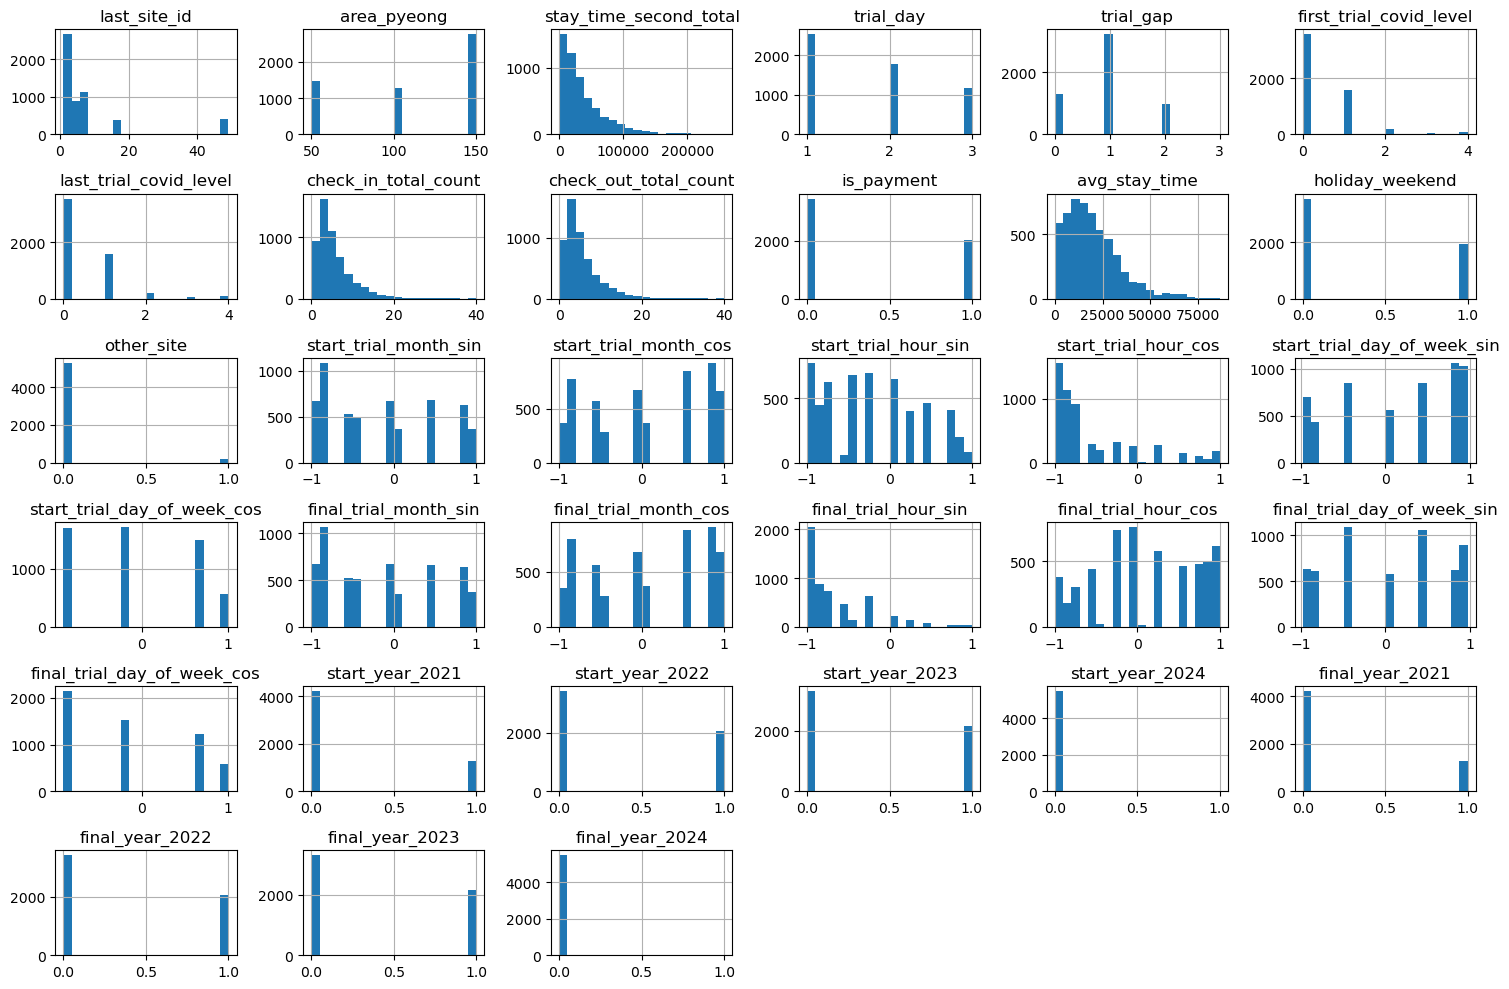

In [15]:
import matplotlib.pyplot as plt

df_ohe.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

In [16]:
import numpy as np

# 1. IQR 방식으로 이상치 경계 계산
Q1 = df_ohe['stay_time_second_total'].quantile(0.25)
Q3 = df_ohe['stay_time_second_total'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 2. 이상치 여부 확인
outlier_mask = (df_ohe['stay_time_second_total'] < lower) | (df_ohe['stay_time_second_total'] > upper)

# 3. 이상치 개수와 비율
outlier_count = outlier_mask.sum()
outlier_ratio = outlier_count / len(df_ohe) * 100

print("이상치 개수:", outlier_count)
print("이상치 비율: %.2f%%" % outlier_ratio)

# 4. 이상치 제거 후 데이터프레임 생성
df_no_outlier = df_ohe[~outlier_mask].reset_index(drop=True)

# 5. 제거 후 데이터 수와 삭제된 데이터 수
print("제거 후 데이터 수:", len(df_no_outlier))
print("삭제된 데이터 수:", outlier_count, f"({outlier_ratio:.2f}%)")

이상치 개수: 277
이상치 비율: 5.05%
제거 후 데이터 수: 5205
삭제된 데이터 수: 277 (5.05%)


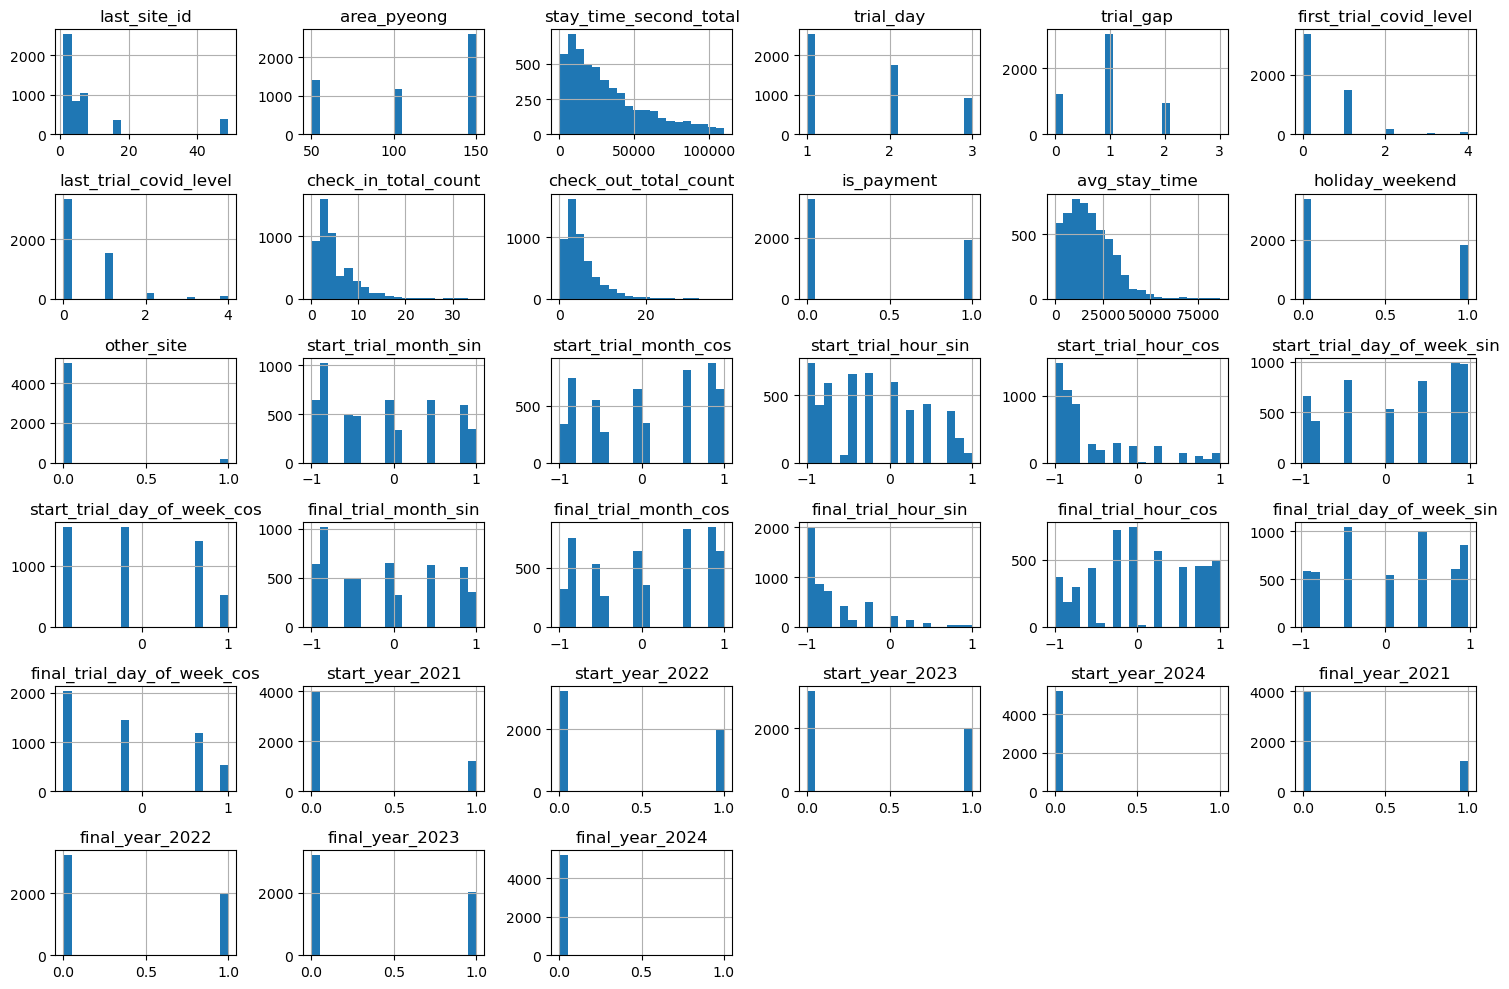

In [17]:
import matplotlib.pyplot as plt

df_no_outlier.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

In [18]:
# 1. IQR 방식으로 이상치 경계 계산
Q1 = df_no_outlier['avg_stay_time'].quantile(0.25)
Q3 = df_no_outlier['avg_stay_time'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 2. 이상치 여부 확인
outlier_mask = (df_no_outlier['avg_stay_time'] < lower) | (df_no_outlier['avg_stay_time'] > upper)

# 3. 이상치 개수와 비율
outlier_count = outlier_mask.sum()
outlier_ratio = outlier_count / len(df_no_outlier) * 100

print("이상치 개수:", outlier_count)
print("이상치 비율: %.2f%%" % outlier_ratio)

# 4. 이상치 제거 후 데이터프레임 생성
df_no_outlier2 = df_no_outlier[~outlier_mask].reset_index(drop=True)

# 5. 제거 후 데이터 수와 삭제된 데이터 수
print("제거 후 데이터 수:", len(df_no_outlier))
print("삭제된 데이터 수:", outlier_count, f"({outlier_ratio:.2f}%)")

이상치 개수: 76
이상치 비율: 1.46%
제거 후 데이터 수: 5205
삭제된 데이터 수: 76 (1.46%)


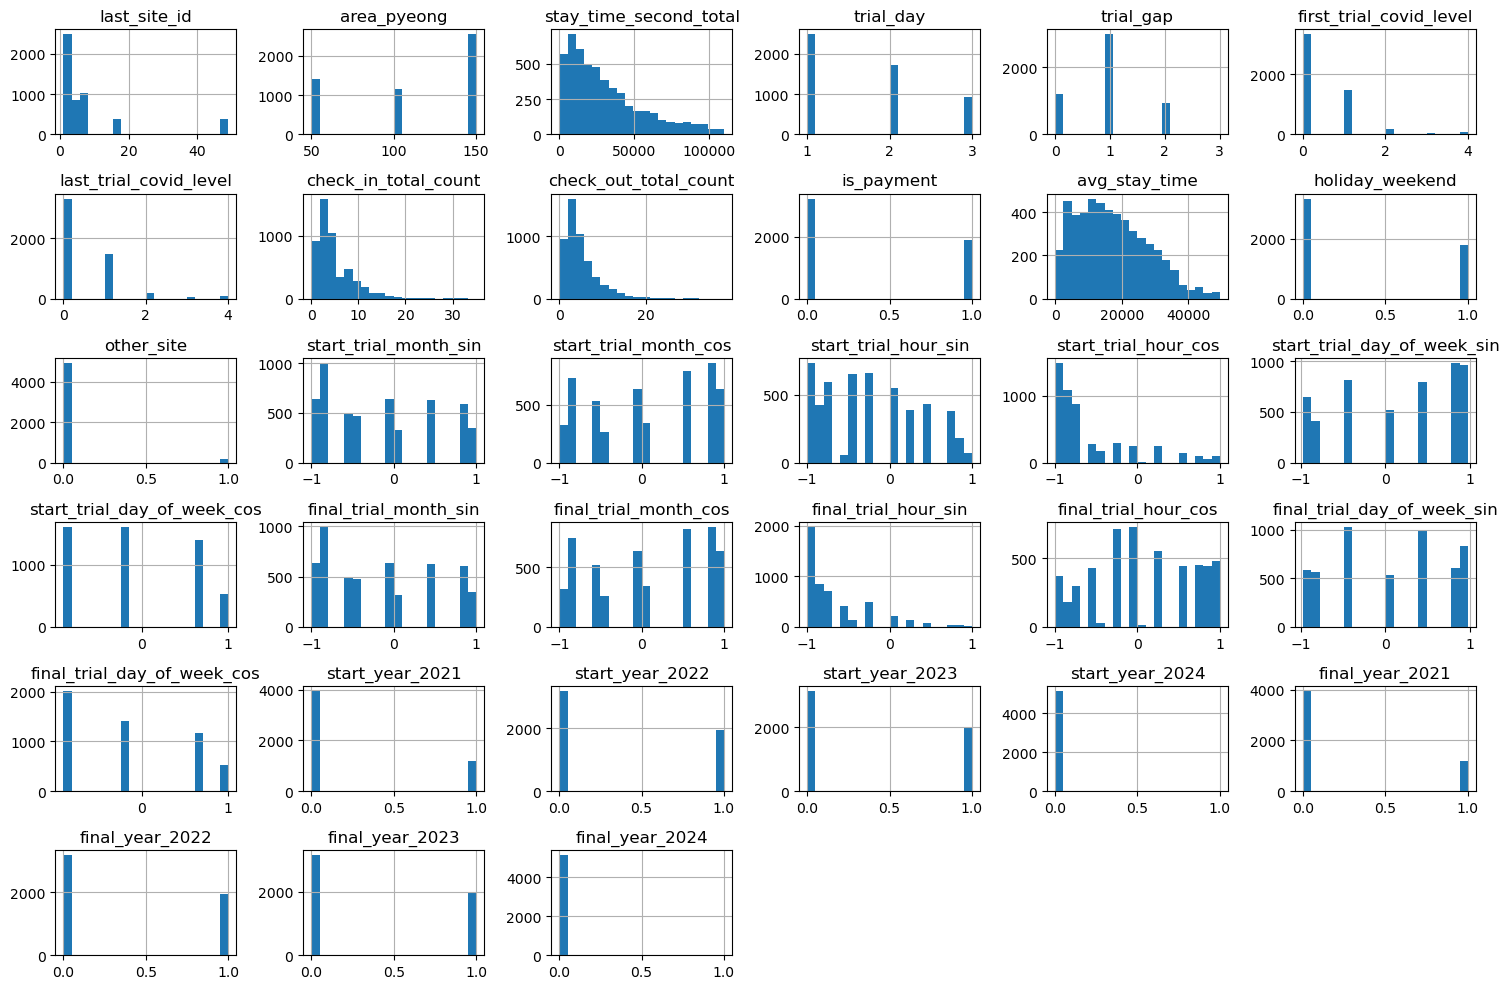

In [19]:
import matplotlib.pyplot as plt

df_no_outlier2.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

---

In [20]:
df_no_outlier2.columns

Index(['user_uuid', 'last_site_id', 'area_pyeong', 'stay_time_second_total',
       'trial_day', 'trial_gap', 'first_trial_covid_level',
       'last_trial_covid_level', 'check_in_total_count',
       'check_out_total_count', 'is_payment', 'avg_stay_time',
       'holiday_weekend', 'other_site', 'start_trial_month_sin',
       'start_trial_month_cos', 'start_trial_hour_sin', 'start_trial_hour_cos',
       'start_trial_day_of_week_sin', 'start_trial_day_of_week_cos',
       'final_trial_month_sin', 'final_trial_month_cos',
       'final_trial_hour_sin', 'final_trial_hour_cos',
       'final_trial_day_of_week_sin', 'final_trial_day_of_week_cos',
       'start_year_2021', 'start_year_2022', 'start_year_2023',
       'start_year_2024', 'final_year_2021', 'final_year_2022',
       'final_year_2023', 'final_year_2024'],
      dtype='object')

---

## 정규화

In [21]:
from scipy.stats import boxcox

# 복사본 생성
df_bc = df_no_outlier2.copy()

cols = ["stay_time_second_total", "avg_stay_time", 
        "check_in_total_count", "check_out_total_count"]

lambdas = {}  # 변환에 쓰인 lambda 값 저장

for col in cols:
    # 0 이하 값 있으면 +1 shift
    if (df_bc[col] <= 0).any():
        shifted = df_bc[col] + 1
        df_bc[col], fitted_lambda = boxcox(shifted)
    else:
        df_bc[col], fitted_lambda = boxcox(df_bc[col])
    
    lambdas[col] = fitted_lambda  # lambda 값 저장

print("Box-Cox 변환 λ 값들:")

Box-Cox 변환 λ 값들:


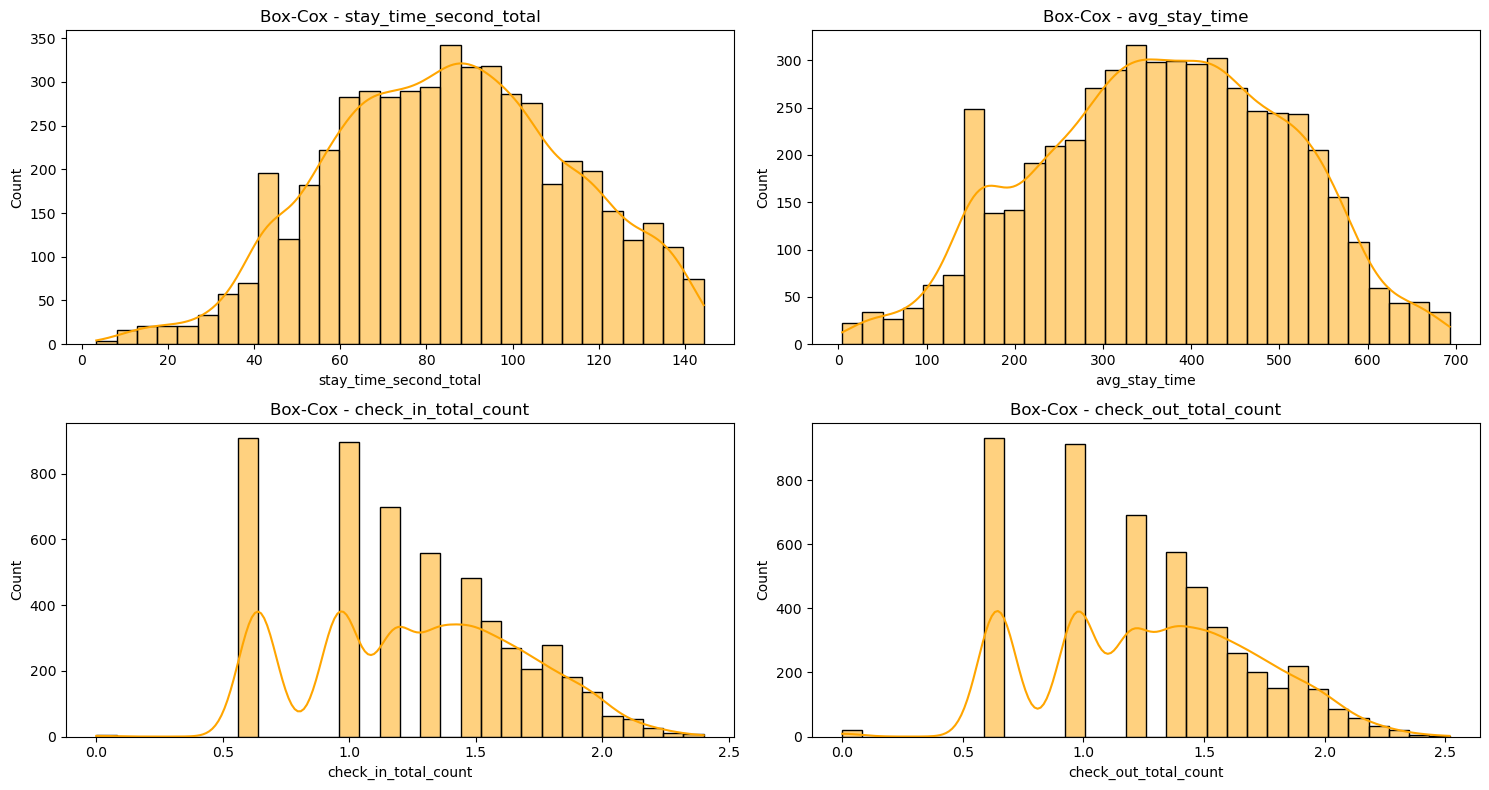

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_bc[col], bins=30, kde=True, color="orange")
    plt.title(f"Box-Cox - {col}")

plt.tight_layout()
plt.show()

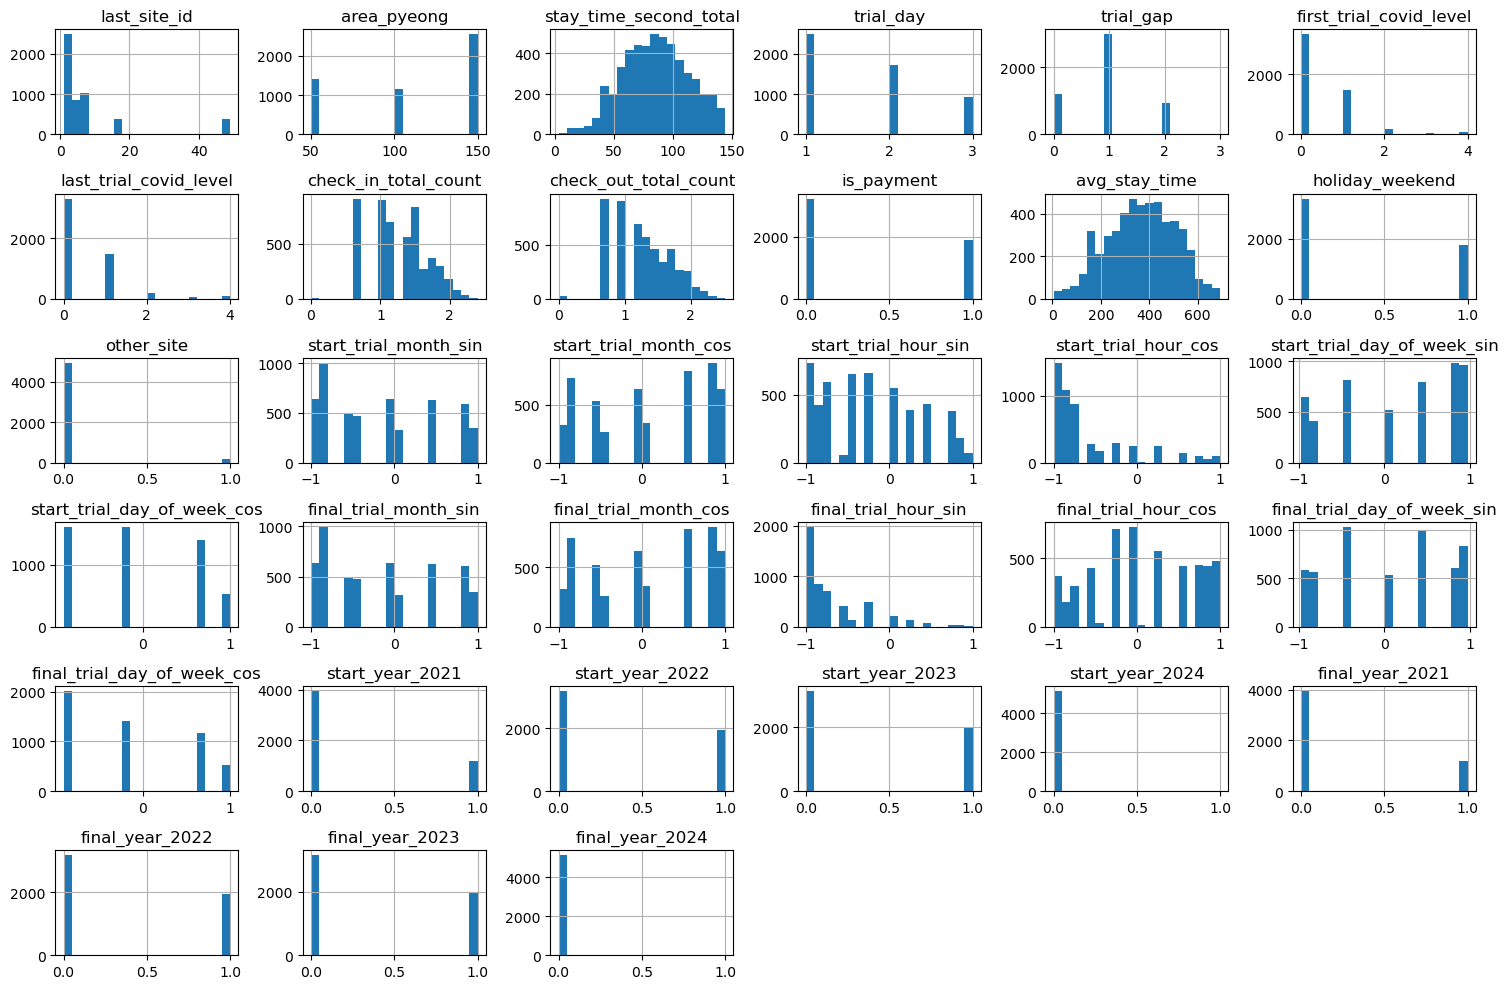

In [23]:
import matplotlib.pyplot as plt

df_bc.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

---

In [25]:
from sklearn.model_selection import train_test_split

# X, y 분리
X = df_scaled.drop(columns=["is_payment", "user_uuid"], errors="ignore")
y = df_scaled["is_payment"]

# 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("y_train 분포:")
print(y_train.value_counts(normalize=True))

X_train shape: (4103, 32)
y_train 분포:
is_payment
0    0.630027
1    0.369973
Name: proportion, dtype: float64


In [26]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


# Optuna objective 함수
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "class_weight": "balanced",
        "random_state": 42,
        "n_jobs": -1
    }

    model = RandomForestClassifier(**params)
    
    # 교차검증으로 점수 평가 (F1-score, 양쪽 클래스 중요할 때 macro)
    scores = cross_val_score(model, X_train, y_train, 
                             cv=3, scoring="f1_macro", n_jobs=-1)
    return scores.mean()

# 스터디 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150, show_progress_bar=True)

[I 2025-09-08 15:24:53,270] A new study created in memory with name: no-name-849dc584-fa0f-4cc5-836e-a527c8b9ec9f
c:\Users\nuwba\anaconda3\Lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/150 [00:00<?, ?it/s]

[I 2025-09-08 15:25:05,974] Trial 0 finished with value: 0.5765688485079427 and parameters: {'n_estimators': 181, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 0 with value: 0.5765688485079427.
[I 2025-09-08 15:25:13,589] Trial 1 finished with value: 0.585907368218616 and parameters: {'n_estimators': 156, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.585907368218616.
[I 2025-09-08 15:25:23,188] Trial 2 finished with value: 0.583291049115055 and parameters: {'n_estimators': 214, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 15, 'max_features': None}. Best is trial 1 with value: 0.585907368218616.
[I 2025-09-08 15:25:25,548] Trial 3 finished with value: 0.5885772182743044 and parameters: {'n_estimators': 217, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 3 with value: 0.5885772182743044.


In [27]:
# 최적 파라미터 확인
print("Best trial:", study.best_trial.params)

best_params = study.best_trial.params
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)

y_pred = rf_best.predict(X_val)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

Best trial: {'n_estimators': 299, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 20, 'max_features': 'sqrt'}
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       647
           1       0.00      0.00      0.00       379

    accuracy                           0.63      1026
   macro avg       0.32      0.50      0.39      1026
weighted avg       0.40      0.63      0.49      1026



c:\Users\nuwba\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nuwba\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nuwba\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.model_selection import train_test_split

# X, y 분리
X = df_scaled.drop(columns=["is_payment", "user_uuid"], errors="ignore")
y = df_scaled["is_payment"]

# 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("y_train 분포:")
print(y_train.value_counts(normalize=True))

X_train shape: (4103, 32)
y_train 분포:
is_payment
0    0.630027
1    0.369973
Name: proportion, dtype: float64


In [29]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "scale_pos_weight": 1.0,   # 불균형이면 0/1 비율 반영해서 넣어도 됨
        "random_state": 42,
        "n_jobs": -1,
        "tree_method": "hist"
    }

    model = XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss")
    
    scores = cross_val_score(model, X_train, y_train, 
                             cv=3, scoring="f1_macro", n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150, show_progress_bar=True)

print("Best params:", study.best_trial.params)

[I 2025-09-08 15:35:07,871] A new study created in memory with name: no-name-17aec052-6ede-4523-b284-f15f55513d94
c:\Users\nuwba\anaconda3\Lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/150 [00:00<?, ?it/s]

[I 2025-09-08 15:35:08,513] Trial 0 finished with value: 0.5375726371024694 and parameters: {'n_estimators': 125, 'max_depth': 10, 'learning_rate': 0.0343720889586346, 'subsample': 0.9627939893578866, 'colsample_bytree': 0.6408864897178517, 'gamma': 2.07674753451552, 'min_child_weight': 3}. Best is trial 0 with value: 0.5375726371024694.
[I 2025-09-08 15:35:09,158] Trial 1 finished with value: 0.5561855894097103 and parameters: {'n_estimators': 167, 'max_depth': 4, 'learning_rate': 0.11127214410123701, 'subsample': 0.7198219802883341, 'colsample_bytree': 0.5955095262829082, 'gamma': 0.5807084333660395, 'min_child_weight': 1}. Best is trial 1 with value: 0.5561855894097103.
[I 2025-09-08 15:35:09,602] Trial 2 finished with value: 0.5471143925247901 and parameters: {'n_estimators': 180, 'max_depth': 10, 'learning_rate': 0.2573531314664595, 'subsample': 0.880042949846798, 'colsample_bytree': 0.902349978692727, 'gamma': 1.7202155164932469, 'min_child_weight': 10}. Best is trial 1 with valu

In [30]:
# 최적 파라미터 확인
print("Best trial:", study.best_trial.params)

best_params = study.best_trial.params
rf_best = XGBClassifier(**best_params)
rf_best.fit(X_train, y_train)

y_pred = rf_best.predict(X_val)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

Best trial: {'n_estimators': 176, 'max_depth': 8, 'learning_rate': 0.19616699818800962, 'subsample': 0.8552890242175061, 'colsample_bytree': 0.6916407387154032, 'gamma': 1.9129172725651467, 'min_child_weight': 6}
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       647
           1       0.50      0.32      0.39       379

    accuracy                           0.63      1026
   macro avg       0.59      0.57      0.56      1026
weighted avg       0.61      0.63      0.61      1026



In [31]:
from sklearn.model_selection import train_test_split

# X, y 분리
X = df_scaled.drop(columns=["is_payment", "user_uuid"], errors="ignore")
y = df_scaled["is_payment"]

# 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("y_train 분포:")
print(y_train.value_counts(normalize=True))

X_train shape: (4103, 32)
y_train 분포:
is_payment
0    0.630027
1    0.369973
Name: proportion, dtype: float64


In [32]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", -1, 20),  # -1 means no limit
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "min_split_gain": trial.suggest_float("min_split_gain", 0, 5),
        "class_weight": "balanced",   # handle class imbalance
        "random_state": 42,
        "n_jobs": -1
    }

    model = LGBMClassifier(**params, verbose=-1)
    
    scores = cross_val_score(model, X_train, y_train, 
                             cv=3, scoring="f1_macro", n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150, show_progress_bar=True)

print("Best params:", study.best_trial.params)

[I 2025-09-08 15:36:21,638] A new study created in memory with name: no-name-1e16a2c7-2222-4d1b-a0e6-c420a6b2e52b
c:\Users\nuwba\anaconda3\Lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/150 [00:00<?, ?it/s]

[I 2025-09-08 15:36:26,693] Trial 0 finished with value: 0.5882523653458251 and parameters: {'n_estimators': 128, 'max_depth': 15, 'learning_rate': 0.14116320072457803, 'subsample': 0.7742832247987294, 'colsample_bytree': 0.674504028415354, 'min_child_samples': 9, 'num_leaves': 150, 'min_split_gain': 4.151692486720532}. Best is trial 0 with value: 0.5882523653458251.
[I 2025-09-08 15:36:31,783] Trial 1 finished with value: 0.5892330447291104 and parameters: {'n_estimators': 287, 'max_depth': 8, 'learning_rate': 0.060622465167179715, 'subsample': 0.7798300873311799, 'colsample_bytree': 0.8949371779316286, 'min_child_samples': 87, 'num_leaves': 144, 'min_split_gain': 2.2220093152961002}. Best is trial 1 with value: 0.5892330447291104.
[I 2025-09-08 15:36:36,621] Trial 2 finished with value: 0.5899386383751147 and parameters: {'n_estimators': 252, 'max_depth': 16, 'learning_rate': 0.015247885220748474, 'subsample': 0.8346325183380834, 'colsample_bytree': 0.7610345821119662, 'min_child_sam

In [33]:
# 최적 파라미터 확인
print("Best trial:", study.best_trial.params)

best_params = study.best_trial.params
rf_best = LGBMClassifier(**best_params, verbose=-1)
rf_best.fit(X_train, y_train)

y_pred = rf_best.predict(X_val)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

Best trial: {'n_estimators': 203, 'max_depth': 6, 'learning_rate': 0.022760551802643934, 'subsample': 0.8192296931500243, 'colsample_bytree': 0.6075802694651942, 'min_child_samples': 71, 'num_leaves': 37, 'min_split_gain': 3.2819081308274662}


Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\nuwba\anaconda3\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "c:\Users\nuwba\anaconda3\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\nuwba\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 24: invalid start byte
c:\Users\nuwba\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nuwba\anaconda3\Lib\site-pack

              precision    recall  f1-score   support

           0       0.65      0.95      0.78       647
           1       0.64      0.14      0.23       379

    accuracy                           0.65      1026
   macro avg       0.65      0.55      0.50      1026
weighted avg       0.65      0.65      0.58      1026

